### Histogram

In [132]:
'''
hist()함수 사용
히스토그램은 자료의 도수분포 상태를 bar로 나타냄
데이터의 빈도(도수)에 따라 막대의 높이가 결정
'''

'\nhist()함수 사용\n히스토그램은 자료의 도수분포 상태를 bar로 나타냄\n데이터의 빈도(도수)에 따라 막대의 높이가 결정\n'

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame ,Series
import seaborn as sns

(array([6., 7., 1., 2., 0., 0., 4., 0., 0., 4.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <a list of 10 Patch objects>)

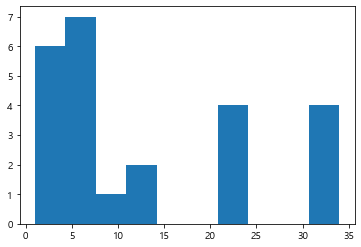

In [134]:
plt.hist([1,23,12,3,31,6,7,8,7,6,34,5,4,6,4,23,1,2,31,23,12,5,34,23])


In [135]:
dice=[]
for i in range(1000000):
    dice.append(np.random.randint(1,6))
'''
큰 수 법칙에 따라 주사위 각 면이 나올 확률은 모두 균등하게 수렴
'''

'\n큰 수 법칙에 따라 주사위 각 면이 나올 확률은 모두 균등하게 수렴\n'

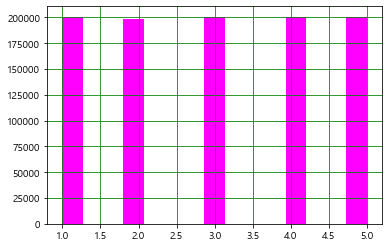

In [136]:
plt.hist(dice,bins=15,color="magenta")
plt.grid(color="green")

(array([  2.,   0.,   1.,   4.,  14.,  10.,  14.,  23.,  36.,  45.,  57.,
         87., 100., 116., 166., 218., 283., 346., 327., 401., 493., 525.,
        543., 597., 579., 584., 611., 581., 535., 456., 442., 340., 334.,
        272., 201., 147., 129., 101.,  91.,  60.,  40.,  28.,  20.,  20.,
         11.,   5.,   2.,   1.,   0.,   2.]),
 array([ 43.69555668,  45.95106183,  48.20656699,  50.46207214,
         52.71757729,  54.97308245,  57.2285876 ,  59.48409276,
         61.73959791,  63.99510307,  66.25060822,  68.50611337,
         70.76161853,  73.01712368,  75.27262884,  77.52813399,
         79.78363915,  82.0391443 ,  84.29464946,  86.55015461,
         88.80565976,  91.06116492,  93.31667007,  95.57217523,
         97.82768038, 100.08318554, 102.33869069, 104.59419584,
        106.849701  , 109.10520615, 111.36071131, 113.61621646,
        115.87172162, 118.12722677, 120.38273193, 122.63823708,
        124.89374223, 127.14924739, 129.40475254, 131.6602577 ,
        133.915762

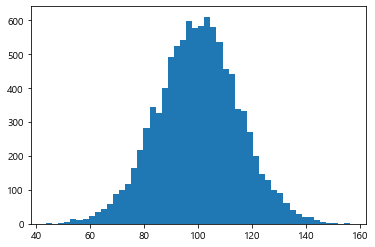

In [137]:
mu,sigma=100,15
x=mu+sigma*np.random.randn(10000)
plt.hist(x,bins=50)
# plt.show()

[50, 150, 0, 0.03]

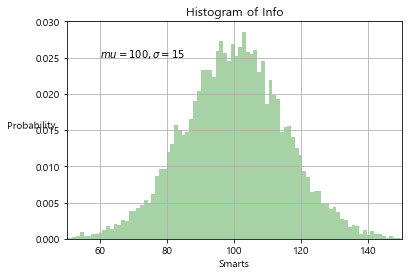

In [138]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')

n,bins,patches=plt.hist(x,bins=100,density=1,facecolor="green",alpha=0.35,) # 투명도 0~1
plt.xlabel("Smarts")
plt.ylabel("Probability",rotation=1)
plt.title("Histogram of Info")
plt.text(60,0.025,r"$mu=100, \sigma=15$") # \sigma앞에 넣으면 부호로 바꿔줌..r은 문자열 그대로 읽으라는 뜻. $사이에 문자열 넣기  
# 한글은 encoding="cp949" 처리
plt.grid()
plt.axis([50,150,0,0.03])


## Pandas를 이용한 Plot 시각화

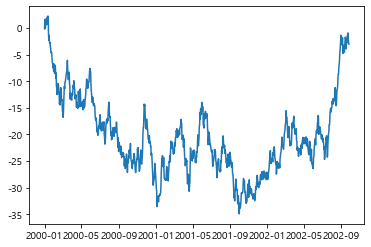

In [143]:
ts=pd.Series(np.random.randn(1000),
            index=pd.date_range("1/1/2000",
            periods=1000)) # periods의 기본값은 day
ts=ts.cumsum()
plt.plot(ts)

TypeError: set_color_codes() takes from 0 to 1 positional arguments but 3 were given

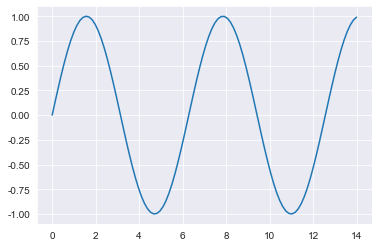

In [157]:
x=np.linspace(0,14,100)
y=np.sin(x)
plt.plot(x,y)
sns.set_style("dark")
sns.set_style("darkgrid")
sns.clustermap()

## Seaborn - boxplot

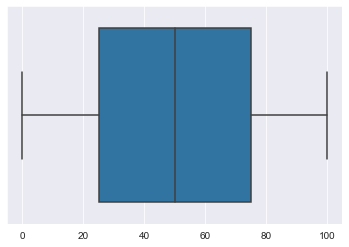

In [174]:
# 0 ~ 100, 101개 숫자
x=np.array(np.linspace(start=0,stop=100,num=100))
df=DataFrame(x,columns=["feature"])
sns.boxplot(x)
# 중간값으로 4분위

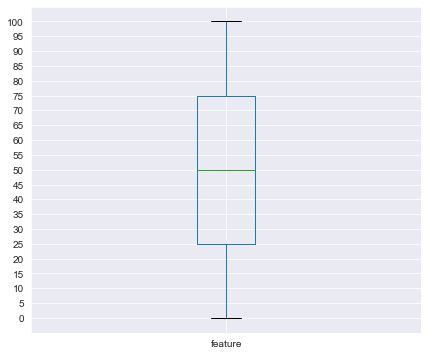

In [181]:
'''
최소값, 최대값이 가장 바깥 가로선, 4분위(25,75) 기준으로 box 크기 결정, box안에 중간값.
'''
plt.figure(figsize=(7,6))
df.boxplot(column=["feature"])
plt.yticks(np.arange(0,101,step=5))
plt.show()

In [188]:
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


AttributeError: module 'seaborn' has no attribute 'ylabel'

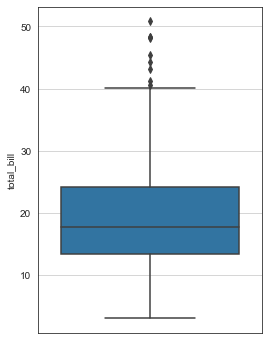

In [202]:
plt.figure(figsize=(4,6))
tips.boxplot(column=["total_bill"])
sns.boxplot(y=tips["total_bill"])
sns.set_style("white")

In [ ]:
# 요일별 total_bill


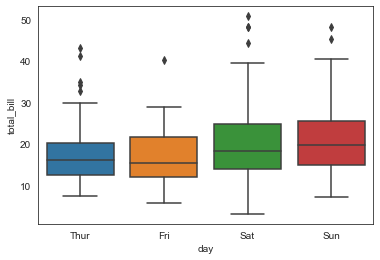

In [205]:
sns.boxplot(y=tips["total_bill"],x=tips["day"])

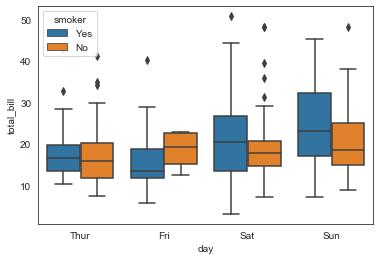

In [209]:
# 흡연 여부에 따라 요일별 음식 값
sns.boxplot(y=tips["total_bill"],x=tips["day"],hue=tips["smoker"])

## 이상치 제거

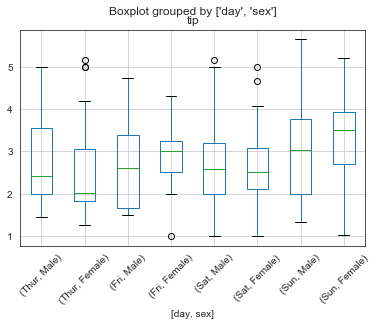

In [236]:
'''
boxplot 이상치값 제거하는 방법
1) 이상치값 제거
2) 이상치값 변환 - NaN 많이 사용
'''

z=tips.boxplot(column=['tip'],by=["day","sex"])
plt.xticks(rotation=45)
def removeOutiler(x,column):
    # Q1. Q3 구하기
    q1=x[column].quantile(0.25)
    q3=x[column].quantile(0.75)
    
    # iqt(IQR=4분위 범위를 벗어난 값..)
    iqt=1.5*(q3-q1)
    
    #원래 데이터 복제
    y=x
    
    y["tip"][(tips["tip"]>(q3+iqt))|(tips["tip"]<(q1-iqt))]=None
    y["tip"]
    return (y)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


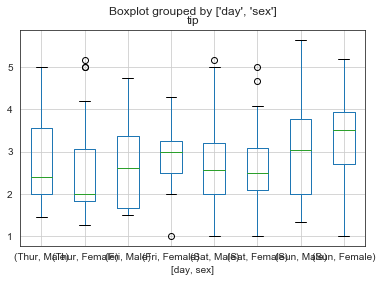

In [246]:
removeOutiler(tips,"tip").boxplot(column="tip",by=["day","sex"])


## lmplot

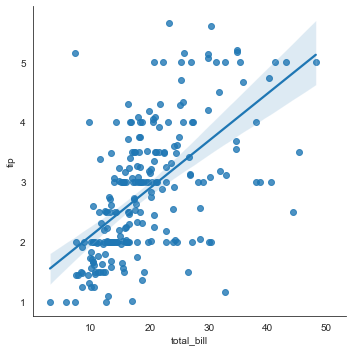

In [249]:
'''
선, 쉐도우,그래프의 의미/특징 정리
'''
sns.lmplot(x="total_bill",y="tip",data=tips)
plt.show()

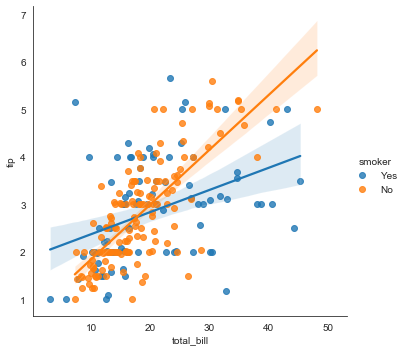

In [253]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=tips)
plt.show()

## HeatMap

In [256]:
flights=sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [280]:
flights.pivot_table(index=["month"],columns="year", values="passengers", aggfunc=["median"])


median                                                       
year        1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                  
January      112  115  145  171  196  204  242  284  315  340  360  417
February     118  126  150  180  196  188  233  277  301  318  342  391
March        132  141  178  193  236  235  267  317  356  362  406  419
April        129  135  163  181  235  227  269  313  348  348  396  461
May          121  125  172  183  229  234  270  318  355  363  420  472
June         135  149  178  218  243  264  315  374  422  435  472  535
July         148  170  199  230  264  302  364  413  465  491  548  622
August       148  170  199  242  272  293  347  405  467  505  559  606
September    136  158  184  209  237  259  312  355  404  404  463  508
October      119  133  162  191  211  229  274  306  347  359  407  461
November     104  114  146  172  180  203  237  271  305  310  362  390
December     118  140  166  194  201  229  278  306  336  337  405  432

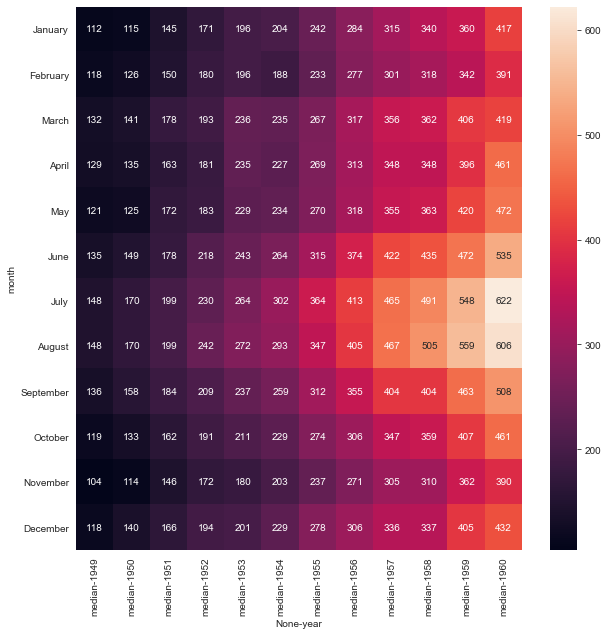

In [297]:
plt.figure(figsize=(10,10))
sns.heatmap(flights.pivot_table(index=["month"],columns="year", values="passengers", aggfunc=["median"]), 
            annot=True,fmt="d")

# 격자 안에 값이 보이도록
